### Styling and imports

In [1]:
%%html
<style>
    .purple {
        background-color: #e6ccff;
    }
    .green {
        background-color: #99ffdd;
    }
    .blue {
        background-color: #b3f0ff;
    }
    .yellow{
        background-color: #ffffb3;
    }
    .center {
        text-align: center;
    }
    .small-padding {
        padding: 5px;
    }
    .extra-padding {
        padding: 20px;
    }
</style>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta
import time
import json
import statistics
import seaborn as sns
import csv

<div class="green extra-padding">
<h1 class="center">Our question: What is the impact of air pollution and how can we improve air quality in the London Borough of Hammersmith and Fulham?</h1>
<strong>In this analysis:</strong>
<ol>
<li>What is the main cause of air pollution in the borough and what factors are influencing levels of air pollutants? E.g. times of day, month, traffic, weather, location- urban/roadside etc</li>
<li>What is the impact of air pollution on our health and the NHS?</li>
<li>What has been the impact of schemes such as ULEZ and Covid on reducing air pollution and how can this inform future policies?</li>
</ol>
</div>

<div class="yellow extra-padding">
    <h2>Data loading and cleaning</h2>
</div>

<div class="purple small-padding">
    <h3>Fetch Hammersmith Air Quality data from API and save to CSV</h3>
</div>

In [3]:
# These sections are commented out as the data has already been retrieved using the API
# Please load data from the saved csv 
# To test the API response, please enter an API key below

# Hammersmith coords for school near A4
# lat= '51.493096'
# lon= '-0.224079'

# API = 'ADD_API_KEY_HERE'

# # Past 3 years 
# end_date = datetime(2024, 1, 1, 12, 00, 00)
# start_date = end_date - timedelta(days=1095)

# start = int(start_date.timestamp())
# end = int(end_date.timestamp())

# response = requests.get(f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={API}')


# # Check response success
# if response.status_code == 200:
#     data = response.json()
# else:
#     print(f"Error: {response.status_code}")

In [4]:
# Data already saved
# file_path = "../data_unclean/air_pollution_data_hammersmith_3_years.csv"

# def save_to_csv(response, file_path):
#     records = []
#     for entry in response['list']:
#         record = {
#             "date_time": entry["dt"],
#             "aqi": entry["main"]["aqi"],
#             "co": entry["components"]["co"],
#             "no": entry["components"]["no"],
#             "no2": entry["components"]["no2"],
#             "o3": entry["components"]["o3"],
#             "so2": entry["components"]["so2"],
#             "pm2_5": entry["components"]["pm2_5"],
#             "pm10": entry["components"]["pm10"],
#             "nh3": entry["components"]["nh3"],
#         }
#         records.append(record)
#     aq_df = pd.DataFrame(records)
#     path = file_path
#     aq_df.to_csv(path, index=False)
#     return aq_df

# save_to_csv(response.json(), file_path)

<div class="purple small-padding">
    <h3>Load data from CSV</h3>
</div>

In [5]:
air_quality_hammersmith = pd.read_csv('data_unclean/air_pollution_data_hammersmith_3_years.csv')
air_quality_hammersmith.head(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1609502400,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98
1,1609506000,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44
2,1609509600,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24
3,1609513200,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03
4,1609516800,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82
5,1609520400,2,323.77,14.53,47.30,0.04,15.74,7.85,9.31,0.71
6,1609524000,2,310.42,11.06,49.35,0.26,14.66,6.31,7.63,0.66
7,1609527600,2,307.08,8.61,50.72,0.68,15.14,6.21,7.32,0.62
8,1609531200,2,310.42,6.87,49.35,1.11,15.74,6.32,7.38,0.59
9,1609534800,2,303.75,4.92,45.24,1.97,15.14,6.00,7.15,0.56


In [6]:
air_quality_hammersmith.tail(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
26007,1704078000,2,233.65,0.00,2.25,67.23,1.42,0.50,0.83,0.20
26008,1704081600,2,233.65,0.00,2.46,67.23,1.61,0.50,0.86,0.21
26009,1704085200,2,233.65,0.00,2.78,66.52,1.86,0.50,0.90,0.24
26010,1704088800,2,233.65,0.00,3.47,67.23,2.21,0.50,0.93,0.29
26011,1704092400,2,240.33,0.00,6.17,65.80,3.13,0.55,1.07,0.40
26012,1704096000,2,240.33,0.00,9.42,63.66,3.87,0.72,1.39,0.52
26013,1704099600,2,240.33,0.01,10.88,64.37,4.29,0.81,1.65,0.62
26014,1704103200,2,236.99,0.08,10.37,70.10,4.29,0.80,1.69,0.67
26015,1704106800,2,236.99,0.21,9.08,75.10,3.99,0.68,1.44,0.67
26016,1704110400,2,233.65,0.30,7.97,77.96,3.61,0.57,1.13,0.63


<div class="purple small-padding">
    <h3>Change datetime to readable format</h3>
</div>

In [7]:
air_quality_hammersmith['date_time'] = pd.to_datetime(air_quality_hammersmith['date_time'], unit='s')
air_quality_hammersmith.head(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2021-01-01 12:00:00,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98
1,2021-01-01 13:00:00,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44
2,2021-01-01 14:00:00,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24
3,2021-01-01 15:00:00,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03
4,2021-01-01 16:00:00,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82
5,2021-01-01 17:00:00,2,323.77,14.53,47.30,0.04,15.74,7.85,9.31,0.71
6,2021-01-01 18:00:00,2,310.42,11.06,49.35,0.26,14.66,6.31,7.63,0.66
7,2021-01-01 19:00:00,2,307.08,8.61,50.72,0.68,15.14,6.21,7.32,0.62
8,2021-01-01 20:00:00,2,310.42,6.87,49.35,1.11,15.74,6.32,7.38,0.59
9,2021-01-01 21:00:00,2,303.75,4.92,45.24,1.97,15.14,6.00,7.15,0.56


In [8]:
air_quality_hammersmith.tail(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
26007,2024-01-01 03:00:00,2,233.65,0.00,2.25,67.23,1.42,0.50,0.83,0.20
26008,2024-01-01 04:00:00,2,233.65,0.00,2.46,67.23,1.61,0.50,0.86,0.21
26009,2024-01-01 05:00:00,2,233.65,0.00,2.78,66.52,1.86,0.50,0.90,0.24
26010,2024-01-01 06:00:00,2,233.65,0.00,3.47,67.23,2.21,0.50,0.93,0.29
26011,2024-01-01 07:00:00,2,240.33,0.00,6.17,65.80,3.13,0.55,1.07,0.40
26012,2024-01-01 08:00:00,2,240.33,0.00,9.42,63.66,3.87,0.72,1.39,0.52
26013,2024-01-01 09:00:00,2,240.33,0.01,10.88,64.37,4.29,0.81,1.65,0.62
26014,2024-01-01 10:00:00,2,236.99,0.08,10.37,70.10,4.29,0.80,1.69,0.67
26015,2024-01-01 11:00:00,2,236.99,0.21,9.08,75.10,3.99,0.68,1.44,0.67
26016,2024-01-01 12:00:00,2,233.65,0.30,7.97,77.96,3.61,0.57,1.13,0.63


<div class="purple small-padding">
    <h3>Load Weather Data (retrieved from Open Meteo)</h3>
</div>

In [9]:
weather_data = pd.read_csv('data_unclean/weather_hammersmith.csv')
weather_data.head()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°)
0,2021-01-01T00:00,-0.1,96,0.0,0.0,0.0,1007.8,3.8,7.6,253
1,2021-01-01T01:00,-0.7,97,0.0,0.0,0.0,1008.0,4.7,10.5,261
2,2021-01-01T02:00,-1.1,98,0.0,0.0,0.0,1008.3,5.0,12.7,270
3,2021-01-01T03:00,-1.7,97,0.0,0.0,0.0,1008.7,6.1,14.0,270
4,2021-01-01T04:00,-2.3,97,0.0,0.0,0.0,1008.7,6.9,14.7,279


In [10]:
weather_data.time = pd.to_datetime(weather_data.time)
weather_data.describe()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°)
count,26304,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,2022-07-02 23:30:00,11.518891,79.015625,0.085056,0.084018,0.000727,1014.422651,14.627365,24.297354,190.498898
min,2021-01-01 00:00:00,-10.200000,17.000000,0.000000,0.000000,0.000000,952.700000,0.000000,0.000000,1.000000
25%,2021-10-01 23:45:00,7.175000,70.000000,0.000000,0.000000,0.000000,1007.800000,8.700000,16.500000,102.000000
50%,2022-07-02 23:30:00,11.400000,83.000000,0.000000,0.000000,0.000000,1015.400000,13.200000,23.200000,217.000000
75%,2023-04-02 23:15:00,16.000000,91.000000,0.000000,0.000000,0.000000,1022.100000,19.200000,30.700000,253.000000
max,2024-01-01 23:00:00,38.000000,100.000000,14.700000,14.700000,1.400000,1044.700000,68.000000,99.800000,360.000000
std,NaN,6.388734,14.926841,0.372900,0.371140,0.018705,11.117060,7.569446,11.276076,93.808941


In [11]:
weather_data.isna().sum()

time                        0
temperature_2m (°C)         0
relative_humidity_2m (%)    0
precipitation (mm)          0
rain (mm)                   0
snowfall (cm)               0
surface_pressure (hPa)      0
wind_speed_10m (km/h)       0
wind_speed_100m (km/h)      0
wind_direction_10m (°)      0
dtype: int64

In [13]:
# Rename columns
weather_data = weather_data.rename(columns = {
    'time':'time',
    'temperature_2m (°C)':'temp_C', 
    'relative_humidity_2m (%)': 'percent_humidity',
    'precipitation (mm)':'precipitation',
    'rain (mm)': 'rain',
    'snowfall (cm)': 'snowfall',
    'surface_pressure (hPa)':'surface_pressure',
    'wind_speed_10m (km/h)': 'wind_speed_10m',
    'wind_speed_100m (km/h)':'wind_speed_100m',
    'wind_direction_10m (°)':'wind_direction'
})

In [14]:
weather_data.columns

Index(['time', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

<div class="purple small-padding">
    <h3>Merge weather and air quality data and get overview</h3>
</div>

In [15]:
weather_aq = pd.merge(air_quality_hammersmith, weather_data, left_on='date_time',right_on='time', how='left')

In [16]:
weather_aq.head()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,time,temp_C,percent_humidity,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction
0,2021-01-01 12:00:00,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98,2021-01-01 12:00:00,1.4,92,0.0,0.0,0.0,1010.4,8.3,10.5,265
1,2021-01-01 13:00:00,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44,2021-01-01 13:00:00,2.1,91,0.0,0.0,0.0,1010.0,9.4,11.9,270
2,2021-01-01 14:00:00,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24,2021-01-01 14:00:00,2.5,91,0.0,0.0,0.0,1010.0,9.4,12.6,263
3,2021-01-01 15:00:00,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03,2021-01-01 15:00:00,2.8,92,0.0,0.0,0.0,1010.1,8.3,13.3,252
4,2021-01-01 16:00:00,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82,2021-01-01 16:00:00,2.7,95,0.0,0.0,0.0,1010.5,6.5,15.0,267


In [17]:
weather_aq.tail()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,time,temp_C,percent_humidity,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction
26012,2024-01-01 08:00:00,2,240.33,0.00,9.42,63.66,3.87,0.72,1.39,0.52,2024-01-01 08:00:00,5.9,71,0.0,0.0,0.0,1001.5,19.6,35.5,256
26013,2024-01-01 09:00:00,2,240.33,0.01,10.88,64.37,4.29,0.81,1.65,0.62,2024-01-01 09:00:00,6.4,69,0.0,0.0,0.0,1002.3,19.3,34.1,256
26014,2024-01-01 10:00:00,2,236.99,0.08,10.37,70.10,4.29,0.80,1.69,0.67,2024-01-01 10:00:00,7.1,69,0.0,0.0,0.0,1002.7,19.1,31.7,248
26015,2024-01-01 11:00:00,2,236.99,0.21,9.08,75.10,3.99,0.68,1.44,0.67,2024-01-01 11:00:00,7.8,69,0.0,0.0,0.0,1003.2,18.2,29.4,236
26016,2024-01-01 12:00:00,2,233.65,0.30,7.97,77.96,3.61,0.57,1.13,0.63,2024-01-01 12:00:00,8.4,68,0.0,0.0,0.0,1003.1,16.6,25.6,228


In [18]:
weather_aq['aqi'].value_counts()

aqi
1    14572
2     9317
3     1344
4      681
5      103
Name: count, dtype: int64

In [19]:
weather_aq['aqi'].value_counts(normalize=True)

aqi
1    0.560095
2    0.358112
3    0.051659
4    0.026175
5    0.003959
Name: proportion, dtype: float64

<div class="blue">
According to this dataset, Air quality in Hammersmith is rated 'good' 56% of the time, 44% of the time fair or below. It is 'poor' or 'moderate' over 7% of the time and 'very poor' less than one percent of the time.
</div>

In [20]:
weather_aq.columns

Index(['date_time', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'time', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

In [21]:
weather_aq.shape

(26017, 20)

In [22]:
weather_aq.dtypes

date_time           datetime64[ns]
aqi                          int64
co                         float64
no                         float64
no2                        float64
o3                         float64
so2                        float64
pm2_5                      float64
pm10                       float64
nh3                        float64
time                datetime64[ns]
temp_C                     float64
percent_humidity             int64
precipitation              float64
rain                       float64
snowfall                   float64
surface_pressure           float64
wind_speed_10m             float64
wind_speed_100m            float64
wind_direction               int64
dtype: object

<div class="purple small-padding">
    <h3>Data Cleaning</h3>
</div>

In [23]:
weather_aq = weather_aq.drop(columns='time')

In [24]:
weather_aq.columns

Index(['date_time', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

In [25]:
# Create new columns for day, month, hour

weather_aq['day'] = weather_aq['date_time'].dt.dayofweek
# The day of the week with Monday=0, Sunday=6.

In [26]:
weather_aq['month'] = weather_aq['date_time'].dt.month

In [27]:
weather_aq['hour'] = weather_aq['date_time'].dt.hour

In [28]:
weather_aq.head()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
0,2021-01-01 12:00:00,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98,...,0.0,0.0,0.0,1010.4,8.3,10.5,265,4,1,12
1,2021-01-01 13:00:00,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44,...,0.0,0.0,0.0,1010.0,9.4,11.9,270,4,1,13
2,2021-01-01 14:00:00,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24,...,0.0,0.0,0.0,1010.0,9.4,12.6,263,4,1,14
3,2021-01-01 15:00:00,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03,...,0.0,0.0,0.0,1010.1,8.3,13.3,252,4,1,15
4,2021-01-01 16:00:00,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82,...,0.0,0.0,0.0,1010.5,6.5,15.0,267,4,1,16


In [29]:
# Look for missing/anomalous data

weather_aq.describe()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
count,26017,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,...,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000
mean,2022-07-02 09:44:53.669523712,1.555790,249.606006,6.358509,18.793544,50.661807,7.872453,6.815382,8.654816,0.885957,...,0.085175,0.084126,0.000735,1014.434466,14.640931,24.320202,190.313334,2.991967,6.530192,11.500019
min,2021-01-01 12:00:00,1.000000,141.860000,0.000000,1.340000,-9999.000000,0.860000,0.500000,0.530000,0.000000,...,0.000000,0.000000,0.000000,952.700000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2021-09-30 12:00:00,1.000000,205.280000,0.000000,7.800000,30.400000,3.810000,2.230000,3.310000,0.290000,...,0.000000,0.000000,0.000000,1007.800000,8.800000,16.500000,102.000000,1.000000,4.000000,6.000000
50%,2022-06-30 12:00:00,1.000000,233.650000,0.290000,13.370000,53.640000,5.660000,3.990000,5.870000,0.550000,...,0.000000,0.000000,0.000000,1015.500000,13.200000,23.200000,217.000000,3.000000,7.000000,12.000000
75%,2023-04-04 12:00:00,2.000000,270.370000,1.500000,23.990000,70.810000,9.060000,7.760000,10.420000,1.040000,...,0.000000,0.000000,0.000000,1022.100000,19.200000,30.800000,253.000000,5.000000,10.000000,17.000000
max,2024-01-01 12:00:00,5.000000,1268.390000,447.030000,126.120000,205.990000,129.700000,104.540000,108.950000,15.200000,...,14.700000,14.700000,1.400000,1044.700000,68.000000,99.800000,360.000000,6.000000,12.000000,23.000000
std,NaN,0.744838,80.892569,23.804967,15.823728,69.255641,7.844575,8.264211,8.995321,1.104444,...,0.373876,0.372101,0.018808,11.136033,7.555999,11.249840,93.849017,2.002452,3.436163,6.922187


<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>There are some negative values in the o3 data which is impossible. These will be counted and dealt with ..</li>
        <li>There is a large amount of variance in the data for different pollutants, particularly co and o3, however we will be mostly focussing on NO2 and pm2.5 measurements</li>
        <li>There are some 0 values in pollutants data which is also highly unlikely near such a busy road. </li>
        <li>four</li>
        <li>five</li>
    </ul>
</div>

In [30]:
# Check and remove negative values
negative_values = weather_aq[weather_aq.o3 < 0]
len(negative_values)

1

In [31]:
# As there is only 1 negative value, this row can be deleted
weather_aq = weather_aq[weather_aq.o3 >= 0]
weather_aq.describe()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
count,26016,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,...,26016.000000,26016.000000,26016.000000,26016.00000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000
mean,2022-07-02 09:23:22.167896576,1.555812,249.608223,6.358238,18.793687,51.048095,7.872474,6.815534,8.655013,0.885966,...,0.085178,0.084129,0.000735,1014.43454,14.641248,24.320783,190.311308,2.992005,6.530174,11.500192
min,2021-01-01 12:00:00,1.000000,141.860000,0.000000,1.340000,0.000000,0.860000,0.500000,0.530000,0.000000,...,0.000000,0.000000,0.000000,952.70000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2021-09-30 11:45:00,1.000000,205.280000,0.000000,7.800000,30.400000,3.810000,2.230000,3.310000,0.290000,...,0.000000,0.000000,0.000000,1007.80000,8.800000,16.500000,102.000000,1.000000,4.000000,5.750000
50%,2022-06-30 11:30:00,1.000000,233.650000,0.290000,13.370000,53.640000,5.660000,3.990000,5.870000,0.550000,...,0.000000,0.000000,0.000000,1015.50000,13.200000,23.200000,217.000000,3.000000,7.000000,12.000000
75%,2023-04-04 11:15:00,2.000000,270.370000,1.500000,23.990000,70.810000,9.060000,7.760000,10.420000,1.040000,...,0.000000,0.000000,0.000000,1022.10000,19.200000,30.800000,253.000000,5.000000,10.000000,17.250000
max,2024-01-01 12:00:00,5.000000,1268.390000,447.030000,126.120000,205.990000,129.700000,104.540000,108.950000,15.200000,...,14.700000,14.700000,1.400000,1044.70000,68.000000,99.800000,360.000000,6.000000,12.000000,23.000000
std,NaN,0.744845,80.893333,23.805384,15.824015,30.235222,7.844725,8.264334,8.995438,1.104464,...,0.373882,0.372107,0.018808,11.13624,7.555971,11.249665,93.850252,2.002481,3.436228,6.922264


In [32]:
# Convert zero values for pollutants to NaN
weather_aq.iloc[:,:10] = weather_aq.iloc[:,:10].apply(lambda x: x.replace(0, np.nan), axis = 1)
weather_aq.describe()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
count,26016,26016.000000,26016.000000,19189.000000,26016.000000,25064.000000,26016.000000,26016.000000,26016.000000,25879.000000,...,26016.000000,26016.000000,26016.000000,26016.00000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000
mean,2022-07-02 09:23:22.167896576,1.555812,249.608223,8.620351,18.793687,52.987042,7.872474,6.815534,8.655013,0.890656,...,0.085178,0.084129,0.000735,1014.43454,14.641248,24.320783,190.311308,2.992005,6.530174,11.500192
min,2021-01-01 12:00:00,1.000000,141.860000,0.010000,1.340000,0.010000,0.860000,0.500000,0.530000,0.010000,...,0.000000,0.000000,0.000000,952.70000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2021-09-30 11:45:00,1.000000,205.280000,0.150000,7.800000,33.620000,3.810000,2.230000,3.310000,0.290000,...,0.000000,0.000000,0.000000,1007.80000,8.800000,16.500000,102.000000,1.000000,4.000000,5.750000
50%,2022-06-30 11:30:00,1.000000,233.650000,0.720000,13.370000,55.070000,5.660000,3.990000,5.870000,0.550000,...,0.000000,0.000000,0.000000,1015.50000,13.200000,23.200000,217.000000,3.000000,7.000000,12.000000
75%,2023-04-04 11:15:00,2.000000,270.370000,2.680000,23.990000,71.530000,9.060000,7.760000,10.420000,1.040000,...,0.000000,0.000000,0.000000,1022.10000,19.200000,30.800000,253.000000,5.000000,10.000000,17.250000
max,2024-01-01 12:00:00,5.000000,1268.390000,447.030000,126.120000,205.990000,129.700000,104.540000,108.950000,15.200000,...,14.700000,14.700000,1.400000,1044.70000,68.000000,99.800000,360.000000,6.000000,12.000000,23.000000
std,NaN,0.744845,80.893333,27.364630,15.824015,29.088648,7.844725,8.264334,8.995438,1.105496,...,0.373882,0.372107,0.018808,11.13624,7.555971,11.249665,93.850252,2.002481,3.436228,6.922264


In [33]:
# Check missing values
for column_name in weather_aq.columns:
    print(f"{column_name}: {weather_aq[column_name].isna().sum()}")


date_time: 0
aqi: 0
co: 0
no: 6827
no2: 0
o3: 952
so2: 0
pm2_5: 0
pm10: 0
nh3: 137
temp_C: 0
percent_humidity: 0
precipitation: 0
rain: 0
snowfall: 0
surface_pressure: 0
wind_speed_10m: 0
wind_speed_100m: 0
wind_direction: 0
day: 0
month: 0
hour: 0


In [34]:
# Replace missing values with mean

weather_aq['no'] = weather_aq['no'].fillna(weather_aq['no'].mean())
weather_aq['nh3'] = weather_aq['nh3'].fillna(weather_aq['nh3'].mean())
weather_aq['o3'] = weather_aq['o3'].fillna(weather_aq['o3'].mean())
weather_aq.isna().sum()

date_time           0
aqi                 0
co                  0
no                  0
no2                 0
o3                  0
so2                 0
pm2_5               0
pm10                0
nh3                 0
temp_C              0
percent_humidity    0
precipitation       0
rain                0
snowfall            0
surface_pressure    0
wind_speed_10m      0
wind_speed_100m     0
wind_direction      0
day                 0
month               0
hour                0
dtype: int64

<div class="purple small-padding">
    <h3>Save cleaned data to CSV</h3>
</div>

In [35]:
path = 'data_clean/hammersmith_clean.csv'
weather_aq.to_csv(path, index=False)

<div class="purple small-padding">
    <h3>Compare with alternative data source to check accuracy of API data</h3>
</div>

In [36]:
# Data had to been downloaded in separate csvs to cover the whole time period
hammersmith_21 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2021.csv')
hammersmith_22 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2022.csv')
hammersmith_23 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2023.csv')

In [37]:
hammersmith_21.head()

,Data download from AQ England website,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
4,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units


In [38]:
hammersmith_21 = hammersmith_21.drop([0, 1, 2, 3])

hammersmith_21.columns = hammersmith_21.iloc[0]
hammersmith_21 = hammersmith_21.drop(hammersmith_21.index[0]).reset_index(drop=True)
hammersmith_21.columns = [
    "End Date", "End Time", "PM10", "PM10 Status/units",
    "NO", "NO Status/units", "NO2", "NO2 Status/units",
    "NOXasNO2", "NOXasNO2 Status/units", "O3", "O3 Status/units",
    "PM25", "PM25 Status/units"
]
hammersmith_21.head()

,End Date,End Time,PM10,PM10 Status/units,NO,NO Status/units,NO2,NO2 Status/units,NOXasNO2,NOXasNO2 Status/units,O3,O3 Status/units,PM25,PM25 Status/units
0,01/01/2021,01:00:00,27.5,R ugm-3 (Ref.eq),20.92937,R ugm-3,38.37475,R ugm-3,70.466,R ugm-3,16.81045,R ugm-3,24.4,R ugm-3 (BAM)
1,01/01/2021,02:00:00,61.7,R ugm-3 (Ref.eq),6.0364,R ugm-3,31.40525,R ugm-3,40.66093,R ugm-3,17.71516,R ugm-3,67.4,R ugm-3 (BAM)
2,01/01/2021,03:00:00,25.8,R ugm-3 (Ref.eq),3.36416,R ugm-3,21.27606,R ugm-3,26.43437,R ugm-3,30.83357,R ugm-3,24.4,R ugm-3 (BAM)
3,01/01/2021,04:00:00,14.2,R ugm-3 (Ref.eq),3.38563,R ugm-3,21.6773,R ugm-3,26.86853,R ugm-3,28.39881,R ugm-3,14.4,R ugm-3 (BAM)
4,01/01/2021,05:00:00,19.2,R ugm-3 (Ref.eq),3.0349,R ugm-3,20.14869,R ugm-3,24.80214,R ugm-3,29.4715,R ugm-3,19.4,R ugm-3 (BAM)


In [39]:
hammersmith_22.head()

,Data download from AQ England website,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
4,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units


In [40]:
hammersmith_22 = hammersmith_22.drop([0, 1, 2, 3])

hammersmith_22.columns = hammersmith_22.iloc[0]
hammersmith_22 = hammersmith_22.drop(hammersmith_22.index[0]).reset_index(drop=True)
hammersmith_22.columns = [
    "End Date", "End Time", "PM10", "PM10 Status/units",
    "NO", "NO Status/units", "NO2", "NO2 Status/units",
    "NOXasNO2", "NOXasNO2 Status/units", "O3", "O3 Status/units",
    "PM25", "PM25 Status/units"
]
hammersmith_22.head()

,End Date,End Time,PM10,PM10 Status/units,NO,NO Status/units,NO2,NO2 Status/units,NOXasNO2,NOXasNO2 Status/units,O3,O3 Status/units,PM25,PM25 Status/units
0,01/01/2022,01:00:00,25,R ugm-3 (Ref.eq),12.51919,R ugm-3,14.0019,R ugm-3,33.19773,R ugm-3,24.50886,R ugm-3,17,R ugm-3 (BAM)
1,01/01/2022,02:00:00,20.8,R ugm-3 (Ref.eq),10.44011,R ugm-3,11.78449,R ugm-3,27.79244,R ugm-3,NaN,NaN,10,R ugm-3 (BAM)
2,01/01/2022,03:00:00,16.7,R ugm-3 (Ref.eq),7.9662,R ugm-3,9.57374,R ugm-3,21.7884,R ugm-3,26.60892,R ugm-3,9,R ugm-3 (BAM)
3,01/01/2022,04:00:00,15.8,R ugm-3 (Ref.eq),4.87049,R ugm-3,5.53982,R ugm-3,13.00781,R ugm-3,30.71437,R ugm-3,6,R ugm-3 (BAM)
4,01/01/2022,05:00:00,14.2,R ugm-3 (Ref.eq),5.93563,R ugm-3,8.68479,R ugm-3,17.78597,R ugm-3,33.89048,R ugm-3,3,R ugm-3 (BAM)


In [41]:
hammersmith_23.head()

,End Date,End Time,PM10,Status/units,NO,Status/units.1,NO2,Status/units.2,NOXasNO2,Status/units.3,O3,Status/units.4,PM25,Status/units.5,Unnamed: 14
0,01/01/2023,01:00:00,14.2,R ugm-3 (Ref.eq),2.76395,R ugm-3,6.13576,R ugm-3,10.37376,R ugm-3,75.08183,R ugm-3,9.0,R ugm-3 (BAM),NaN
1,01/01/2023,02:00:00,12.5,R ugm-3 (Ref.eq),2.99566,R ugm-3,7.11976,R ugm-3,11.71304,R ugm-3,NaN,NaN,7.0,R ugm-3 (BAM),NaN
2,01/01/2023,03:00:00,14.2,R ugm-3 (Ref.eq),2.59177,R ugm-3,7.22349,R ugm-3,11.19748,R ugm-3,74.64906,R ugm-3,6.0,R ugm-3 (BAM),NaN
3,01/01/2023,04:00:00,16.7,R ugm-3 (Ref.eq),3.53521,R ugm-3,5.82500,R ugm-3,11.24558,R ugm-3,77.11490,R ugm-3,13.0,R ugm-3 (BAM),NaN
4,01/01/2023,05:00:00,17.5,R ugm-3 (Ref.eq),1.55490,R ugm-3,6.46746,R ugm-3,8.85160,R ugm-3,76.83475,R ugm-3,10.0,R ugm-3 (BAM),NaN


In [42]:
hammersmith_23 = hammersmith_23.rename(columns={'Status/units':'PM10 Status/units','Status/units.1':'NO Status/units','Status/units.2':'NO2 Status/units',
                               'Status/units.3':'NOXasNO2 Status/units','Status/units.4':'O3 Status/units','Status/units.5':'PM25 Status/units'})
hammersmith_23 = hammersmith_23.drop(columns='Unnamed: 14')
hammersmith_23.columns

Index(['End Date', 'End Time', 'PM10', 'PM10 Status/units', 'NO',
       'NO Status/units', 'NO2', 'NO2 Status/units', 'NOXasNO2',
       'NOXasNO2 Status/units', 'O3', 'O3 Status/units', 'PM25',
       'PM25 Status/units'],
      dtype='object')

In [43]:
hammersmith_verified = pd.concat([hammersmith_21,hammersmith_22, hammersmith_23])
hammersmith_verified.columns


Index(['End Date', 'End Time', 'PM10', 'PM10 Status/units', 'NO',
       'NO Status/units', 'NO2', 'NO2 Status/units', 'NOXasNO2',
       'NOXasNO2 Status/units', 'O3', 'O3 Status/units', 'PM25',
       'PM25 Status/units'],
      dtype='object')

In [44]:
hammersmith_verified = hammersmith_verified.drop(columns=['PM10 Status/units', 'NO Status/units', 'NO2 Status/units',
                                                          'NOXasNO2 Status/units','O3 Status/units','PM25 Status/units'])
hammersmith_verified.columns

Index(['End Date', 'End Time', 'PM10', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25'], dtype='object')

In [45]:
hammersmith_verified = hammersmith_verified.rename(columns = {'End Date':'date','End Time':'time'})
hammersmith_verified.head(30)

,date,time,PM10,NO,NO2,NOXasNO2,O3,PM25
0,01/01/2021,01:00:00,27.5,20.92937,38.37475,70.466,16.81045,24.4
1,01/01/2021,02:00:00,61.7,6.0364,31.40525,40.66093,17.71516,67.4
2,01/01/2021,03:00:00,25.8,3.36416,21.27606,26.43437,30.83357,24.4
3,01/01/2021,04:00:00,14.2,3.38563,21.6773,26.86853,28.39881,14.4
4,01/01/2021,05:00:00,19.2,3.0349,20.14869,24.80214,29.4715,19.4
5,01/01/2021,06:00:00,20.8,3.82942,21.27712,27.14881,28.71812,22.4
6,01/01/2021,07:00:00,10.8,4.33762,17.10154,23.75246,30.36957,17.4
7,01/01/2021,08:00:00,12.5,4.44499,23.43834,30.25389,26.81722,20.4
8,01/01/2021,09:00:00,15,5.58665,23.81465,32.38073,26.66255,15.4
9,01/01/2021,10:00:00,20.8,6.01612,22.81541,32.03999,28.01963,19.4


In [46]:
nans = hammersmith_verified.isna().sum()
nans

# There are some nans in date and time so these must be removed

date           3
time           6
PM10        3404
NO          2133
NO2         2144
NOXasNO2    2144
O3          3425
PM25        2901
dtype: int64

In [47]:
hammersmith_verified = hammersmith_verified.dropna(subset=['date', 'time'])
nans = hammersmith_verified.isna().sum()
nans

date           0
time           0
PM10        3398
NO          2127
NO2         2138
NOXasNO2    2138
O3          3419
PM25        2895
dtype: int64

In [48]:
# Need to deal with nan values in this data but need to do further cleaning first

In [49]:
# Some times are in incorrect format 24:00:00 so these need to be changed to perform strptime function
hammersmith_verified['time'] = ['23:59:59' if x == '24:00:00' else x for x in hammersmith_verified['time']]


In [50]:
# create new date_time column
hammersmith_verified['date_time'] = hammersmith_verified['date'] + ' ' + hammersmith_verified['time']


In [51]:
# format date time
hammersmith_verified['date_time'] = hammersmith_verified['date_time'].apply(lambda row: datetime.strptime(row, '%d/%m/%Y %H:%M:%S'))

In [52]:
# time was end time so subtract 1 hour from each time to match original data

hammersmith_verified['date_time'] = pd.to_datetime(hammersmith_verified['date_time'])
hammersmith_verified['date_time'] = hammersmith_verified['date_time'].apply(lambda dt: dt - timedelta(hours=1) if pd.notnull(dt) else dt)


In [53]:
# change 22:59:59 back to 23:00:00
hammersmith_verified['date_time'] = hammersmith_verified['date_time'].apply(
    lambda dt: dt.replace(hour=23, minute=0, second=0) if dt.time() == datetime.strptime('22:59:59', '%H:%M:%S').time() else dt
)

In [54]:
hammersmith_verified = hammersmith_verified.drop(columns = ['date', 'time'])
hammersmith_verified.head()

,PM10,NO,NO2,NOXasNO2,O3,PM25,date_time
0,27.5,20.92937,38.37475,70.466,16.81045,24.4,2021-01-01 00:00:00
1,61.7,6.0364,31.40525,40.66093,17.71516,67.4,2021-01-01 01:00:00
2,25.8,3.36416,21.27606,26.43437,30.83357,24.4,2021-01-01 02:00:00
3,14.2,3.38563,21.6773,26.86853,28.39881,14.4,2021-01-01 03:00:00
4,19.2,3.0349,20.14869,24.80214,29.4715,19.4,2021-01-01 04:00:00


<div class="purple small-padding">
    <h3>Dealing with anomalous and NaN values</h3>
</div>

In [55]:
hammersmith_verified.dtypes

PM10                 object
NO                   object
NO2                  object
NOXasNO2             object
O3                   object
PM25                 object
date_time    datetime64[ns]
dtype: object

In [56]:
hammersmith_verified = hammersmith_verified.astype({
    'PM10': 'float',
    'NO': 'float',
    'NO2': 'float',
    'NOXasNO2': 'float',
    'O3': 'float',
    'PM25': 'float',
    'date_time':'datetime64[ns]'
})

In [57]:
hammersmith_verified.describe()

,PM10,NO,NO2,NOXasNO2,O3,PM25,date_time
count,22882.000000,24153.000000,24142.000000,24142.000000,22861.000000,23385.000000,26280
mean,19.342946,37.298966,42.923208,99.656075,34.943669,9.800855,2022-07-02 11:30:00
min,-3.300000,0.033990,0.510530,1.442470,-0.883850,-6.000000,2021-01-01 00:00:00
25%,10.800000,6.810790,20.779097,32.239455,18.080440,5.000000,2021-10-01 17:45:00
50%,15.800000,18.870750,37.263005,67.329230,34.586130,7.400000,2022-07-02 11:30:00
75%,23.300000,50.240070,59.708610,138.043785,50.295880,12.400000,2023-04-02 05:15:00
max,243.300000,520.730190,300.888520,1014.158120,122.373530,179.000000,2023-12-31 23:00:00
std,13.755722,46.841140,28.091629,94.418977,20.932881,8.973716,NaN


In [58]:
# Remove negative values
hammersmith_verified = hammersmith_verified[(hammersmith_verified.PM10>0)&(hammersmith_verified.O3>0)&(hammersmith_verified.PM25>0)]
hammersmith_verified.describe()

,PM10,NO,NO2,NOXasNO2,O3,PM25,date_time
count,19947.000000,19898.000000,19893.000000,19893.000000,19947.000000,19947.000000,19947
mean,20.092661,38.628257,44.221077,103.070381,34.236654,10.092335,2022-06-27 03:44:39.019401216
min,0.800000,0.033990,0.510530,1.442470,0.021350,0.400000,2021-01-01 00:00:00
25%,11.700000,7.406950,22.223030,34.571110,17.046975,5.000000,2021-08-16 17:30:00
50%,16.700000,20.893650,39.200270,72.218050,33.671850,8.000000,2022-05-24 04:00:00
75%,24.200000,52.633463,60.969300,143.151050,49.601875,12.400000,2023-04-16 04:30:00
max,243.300000,449.167590,300.888520,956.983800,122.373530,170.400000,2023-12-31 23:00:00
std,14.027523,46.428661,27.866776,93.947105,20.912689,8.747288,NaN


In [59]:
# set DateTimeIndex
hammersmith_verified.set_index('date_time', inplace=True)


In [60]:
# Use interpolation to fill nan values
hammersmith_interpolated = hammersmith_verified.interpolate(method='time')
# Check this has worked
nans = hammersmith_interpolated.isna().sum()
nans

PM10        0
NO          0
NO2         0
NOXasNO2    0
O3          0
PM25        0
dtype: int64

In [61]:
# Save changes to original df
hammersmith_verified = hammersmith_interpolated
hammersmith_verified = hammersmith_verified.reset_index()
hammersmith_verified.head()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25
0,2021-01-01 00:00:00,27.5,20.92937,38.37475,70.46600,16.81045,24.4
1,2021-01-01 01:00:00,61.7,6.03640,31.40525,40.66093,17.71516,67.4
2,2021-01-01 02:00:00,25.8,3.36416,21.27606,26.43437,30.83357,24.4
3,2021-01-01 03:00:00,14.2,3.38563,21.67730,26.86853,28.39881,14.4
4,2021-01-01 04:00:00,19.2,3.03490,20.14869,24.80214,29.47150,19.4


In [62]:
hammersmith_verified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19947 entries, 0 to 19946
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  19947 non-null  datetime64[ns]
 1   PM10       19947 non-null  float64       
 2   NO         19947 non-null  float64       
 3   NO2        19947 non-null  float64       
 4   NOXasNO2   19947 non-null  float64       
 5   O3         19947 non-null  float64       
 6   PM25       19947 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.1 MB


<div class="purple small-padding">
    <h3>Save dataframe to csv and create alternative df</h3>
</div>

In [63]:
path = 'data_clean/hammersmith_verified_clean.csv'
hammersmith_verified.to_csv(path, index=False)

In [64]:
weather_aq_AQE = pd.merge(hammersmith_verified, weather_data, left_on='date_time', right_on='time')
weather_aq_AQE.columns

Index(['date_time', 'PM10', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25', 'time',
       'temp_C', 'percent_humidity', 'precipitation', 'rain', 'snowfall',
       'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

In [72]:
# Create new columns for day, month, hour

weather_aq_AQE['day'] = weather_aq_AQE['date_time'].dt.dayofweek
# The day of the week with Monday=0, Sunday=6.

In [73]:
weather_aq_AQE['month'] = weather_aq_AQE['date_time'].dt.month

In [74]:
weather_aq_AQE['hour'] = weather_aq_AQE['date_time'].dt.hour

In [75]:
weather_aq_AQE.head()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25,time,temp_C,percent_humidity,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
0,2021-01-01 00:00:00,27.5,20.92937,38.37475,70.46600,16.81045,24.4,2021-01-01 00:00:00,-0.1,96,0.0,0.0,0.0,1007.8,3.8,7.6,253,4,1,0
1,2021-01-01 01:00:00,61.7,6.03640,31.40525,40.66093,17.71516,67.4,2021-01-01 01:00:00,-0.7,97,0.0,0.0,0.0,1008.0,4.7,10.5,261,4,1,1
2,2021-01-01 02:00:00,25.8,3.36416,21.27606,26.43437,30.83357,24.4,2021-01-01 02:00:00,-1.1,98,0.0,0.0,0.0,1008.3,5.0,12.7,270,4,1,2
3,2021-01-01 03:00:00,14.2,3.38563,21.67730,26.86853,28.39881,14.4,2021-01-01 03:00:00,-1.7,97,0.0,0.0,0.0,1008.7,6.1,14.0,270,4,1,3
4,2021-01-01 04:00:00,19.2,3.03490,20.14869,24.80214,29.47150,19.4,2021-01-01 04:00:00,-2.3,97,0.0,0.0,0.0,1008.7,6.9,14.7,279,4,1,4


<div class="yellow extra-padding">
    <h2>1. What is the main cause of air pollution in the borough and what factors are influencing levels of pollutants?</h2>
</div>

<div class="yellow small-padding">
    <h3>Is there a correlation between weather and levels of pollutants?</h3>
</div>

In [65]:
print(weather_aq.columns)
print(weather_aq_AQE.columns)

Index(['date_time', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction', 'day', 'month', 'hour'],
      dtype='object')
Index(['date_time', 'PM10', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25', 'time',
       'temp_C', 'percent_humidity', 'precipitation', 'rain', 'snowfall',
       'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')


In [80]:
heatmap_1 = ['no2', 'o3', 'pm2_5', 'pm10', 'temp_C', 'percent_humidity', 'precipitation', 'surface_pressure', 'wind_speed_10m']
heatmap_2 = ['NO2', 'O3', 'PM25', 'PM10','temp_C', 'percent_humidity', 'precipitation', 'surface_pressure', 'wind_speed_10m']

<Axes: >

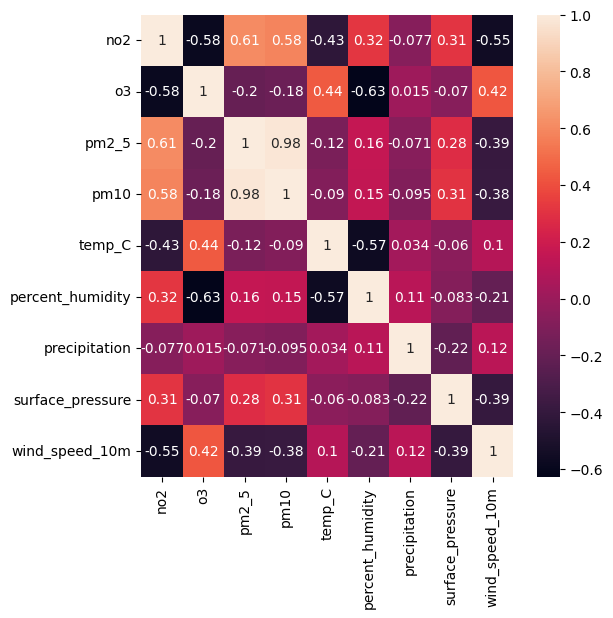

In [81]:
heatmap_data = weather_aq[heatmap_1]
plt.figure(figsize = (6,6))
correlation_matrix = heatmap_data.corr()
sns.heatmap(data = correlation_matrix, annot = True)

<Axes: >

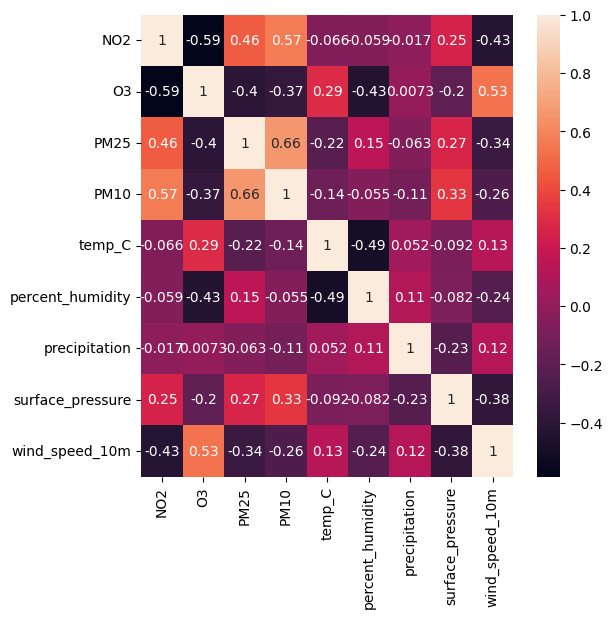

In [82]:
heatmap_data = weather_aq_AQE[heatmap_2]
plt.figure(figsize = (6,6))
correlation_matrix = heatmap_data.corr()
sns.heatmap(data = correlation_matrix, annot = True)

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Both sets of data show a correlation between levels of no2, pm2.5 and pm10</li>
        <li>There is a negative correlation between o3 and other pollutants</li>
        <li>Both sets of data show a negative correlation between humidity and o3</li>
        <li>Boths sets of data show a negative correlation between wind speed and no2, pm2.5 and pm10</li>
        <li>API data shows a negative correlation between temperature and no2 but this cannot be seen in the Air Quality England data set</li>
        <li>There is no correlation between other weather types and pollutants</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>Does time of day affect levels of pollutants?</h3>
</div>

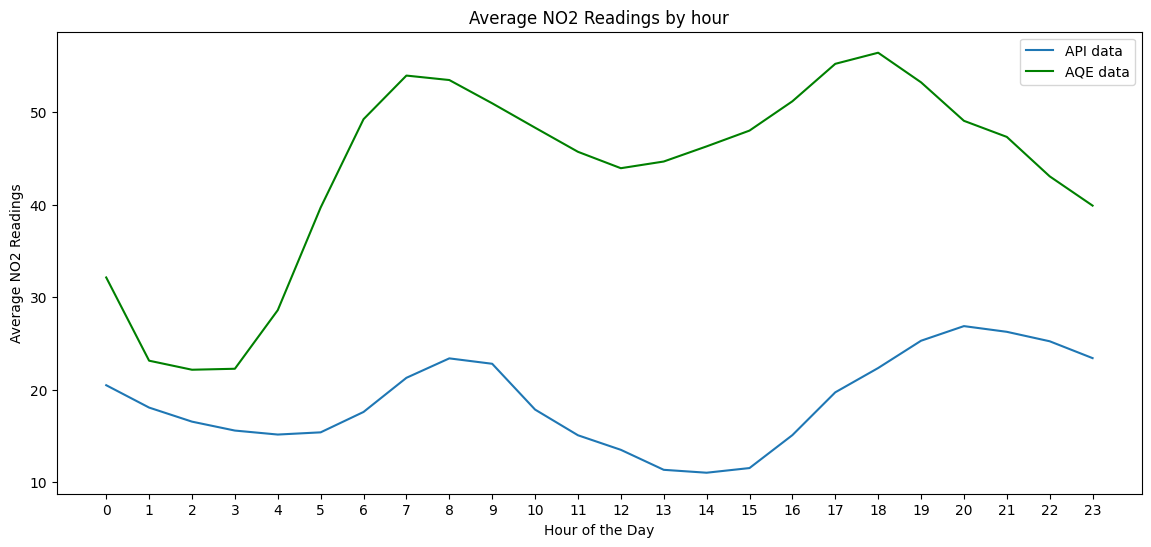

In [77]:
# NO2 data
average_by_hour = weather_aq.groupby('hour').no2.mean().to_frame()
average_by_hour_2 = weather_aq_AQE.groupby('hour').NO2.mean().to_frame()
x = average_by_hour.index.tolist()
y = average_by_hour.no2.tolist()
y_2 = average_by_hour_2.NO2.tolist()
plt.figure(figsize=(14, 6))
plt.plot(x, y, label='API data')
plt.plot(x,y_2, color='green', label='AQE data')
plt.xticks(ticks=x, labels=[str(hour) for hour in x])

plt.xlabel('Hour of the Day')
plt.ylabel('Average NO2 Readings')
plt.title('Average NO2 Readings by hour')
plt.legend()
# Show plot
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Average readings from AQE are much higher than API data</li>
        <li>Both sets of data show a fall in pollutant levels between midnight and 4am and another smaller dip between approx. 9am and approx. 3pm</li>
        <li>The lowest levels during waking hours are at spprox. 1pm</li>
        <li>There are two peaks in levels at approx. 7-8am and 5-6pm, in line with rush hour times.</li>
        <li>The Air Quality England data shows that levels are above the UK target of 40µg/m3 for NO2 between 5am and midnight</li>
    </ul>
</div>

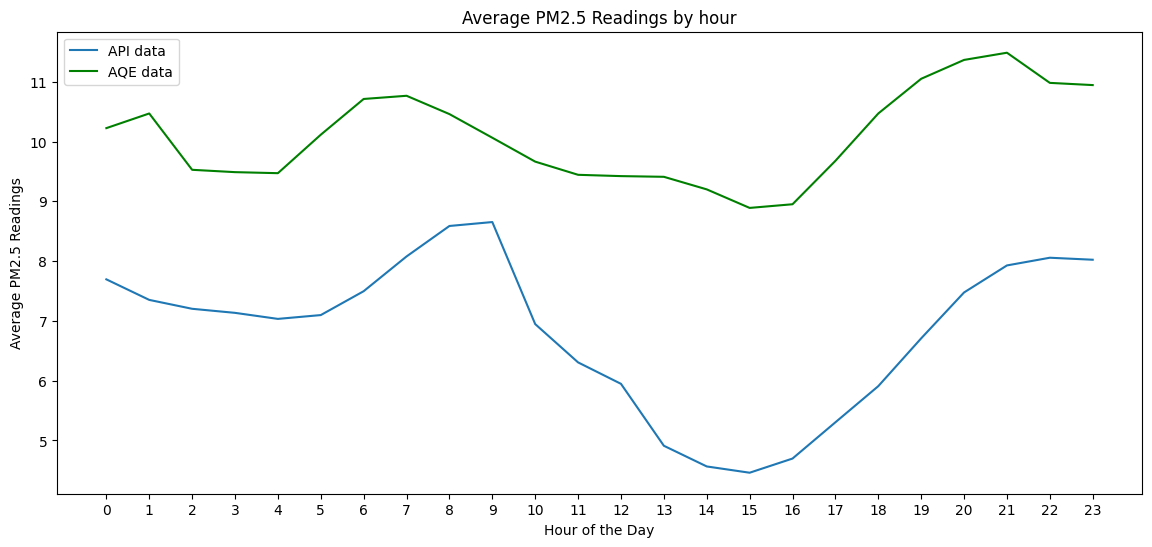

In [79]:
# pm2.5 data
average_by_hour = weather_aq.groupby('hour').pm2_5.mean().to_frame()
average_by_hour_2 = weather_aq_AQE.groupby('hour').PM25.mean().to_frame()
x = average_by_hour.index.tolist()
y = average_by_hour.pm2_5.tolist()
y_2 = average_by_hour_2.PM25.tolist()
plt.figure(figsize=(14, 6))
plt.plot(x, y, label="API data")
plt.plot(x, y_2, color='green', label="AQE data")
plt.xticks(ticks=x, labels=[str(hour) for hour in x])

plt.xlabel('Hour of the Day')
plt.ylabel('Average PM2.5 Readings')
plt.title('Average PM2.5 Readings by hour')
plt.legend()
# Show plot
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Levels of PM2.5 follow a similar pattern to NO2</li>
        <li>Pollutant levels are again much higher accoridng to the AQE data</li>
        <li>According to AQE data there is a more prolonged, less significant fall in levels between 7am and 4pms</li>
        <li>These levels meet current Air Quality objective of 20µg/m3 but exceed target of 10µg/m3 at multiple times of day</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>Are levels of pollutants different at different times of year?</h3>
</div>

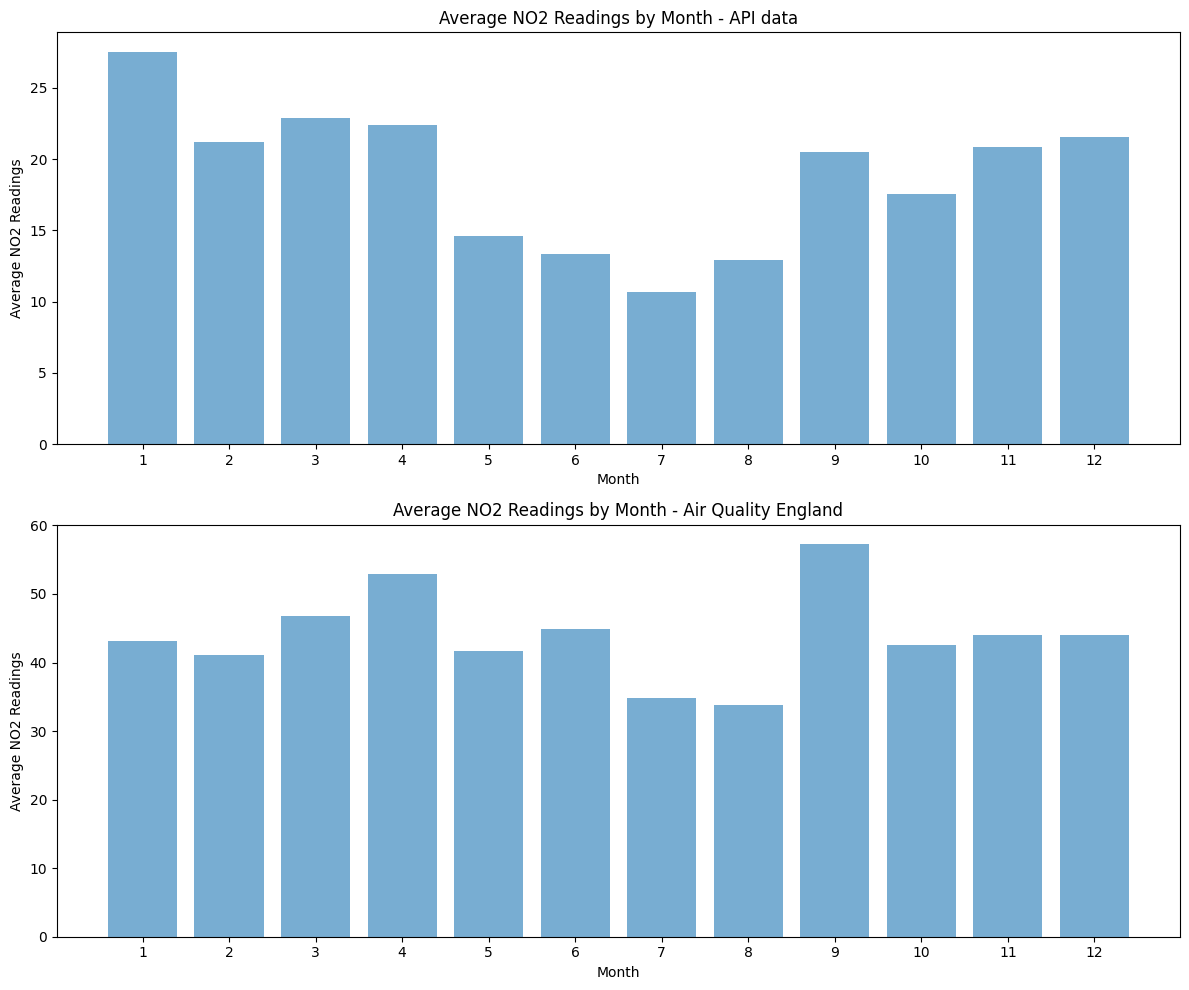

In [86]:
# NO2 data
average_by_month = weather_aq.groupby('month').no2.mean().to_frame()
average_by_month_2 = weather_aq_AQE.groupby('month').NO2.mean().to_frame()
x = average_by_month.index.tolist()
y = average_by_month.no2.tolist()
y_2 = average_by_month_2.NO2.tolist()
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the first bar chart
axs[0].bar(x, y, alpha=0.6)
axs[0].set_xticks(x)
axs[0].set_xticklabels([str(month) for month in x])
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average NO2 Readings')
axs[0].set_title('Average NO2 Readings by Month - API data')

# Plot the second bar chart
axs[1].bar(x, y_2, alpha=0.6)
axs[1].set_xticks(x)
axs[1].set_xticklabels([str(month) for month in x])
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average NO2 Readings')
axs[1].set_title('Average NO2 Readings by Month - Air Quality England')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Both sets of data show a dip in the summer months July-August though this is less pronounced in the AQE data</li>
        <li>AQE data shows that NO2 levels are highest on average in September and also high in April</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>Are levels of pollutants different on different days?</h3>
</div>

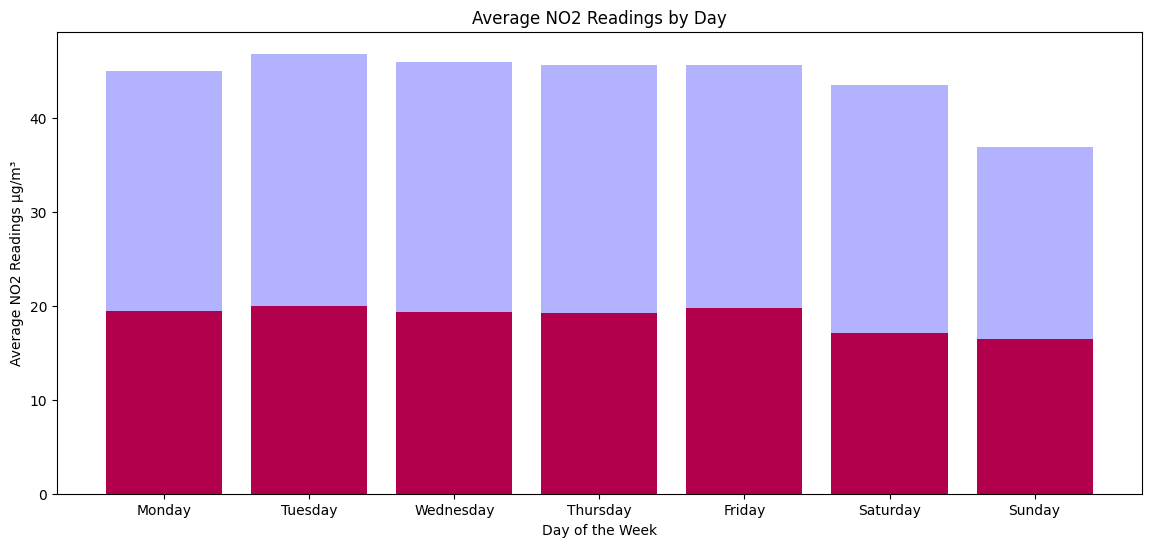

In [103]:
average_no2_by_day = weather_aq.groupby('day').no2.mean().to_frame()
average_no2_by_day_AQE = weather_aq_AQE.groupby('day').NO2.mean().to_frame()
x = average_no2_by_day.index.tolist()
y = average_no2_by_day.no2.tolist()
y_2 = average_no2_by_day_AQE.NO2.tolist()

plt.figure(figsize=(14, 6))
plt.bar(x, y, color='red')
plt.bar(x, y_2, color='blue', alpha=0.3)
plt.xticks(ticks=x, labels=['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday'])

plt.xlabel('Day of the Week')
plt.ylabel('Average NO2 Readings μg/m³')
plt.title('Average NO2 Readings by Day')


plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Both data sets agree that there is a higher level of NO2 throughout the week and a dip at weekends</li>
        <li>NO2 levels are at their lowest on Sundays</li>
        <li>NO2 levels are at their highest on Tuesdays but are of similar levels throughout the week</li>
        <li>NO2 levels are above the 40μg/m³ yearly mean target from Monday-Saturday according to AQE data</li>
    </ul>
</div>

<div class="yellow extra-padding">
    <h2>What is the impact of air pollution on our health and the NHS?</h2>
</div>

<div class="yellow extra-padding">
    <h2>What has been the impact of schemes such as ULEZ and Covid on reducing air pollution and how can this inform future policies?</h2>
</div>

<div class="purple small-padding">
    <h3>Second class heading</h3>
</div>

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>one</li>
        <li>two</li>
        <li>three</li>
        <li>four</li>
        <li>five</li>
    </ul>
</div>

<div class="purple small-padding">
    <h3>Second class heading</h3>
</div>

<div class="purple small-padding">
    <h3>Second class heading</h3>
</div>

<div class="purple extra-padding">
    <h3>Second class heading</h3>
</div>

<div class="blue extra-padding">
    <strong>Observations</strong>
    <ul>
        <li>one</li>
        <li>two</li>
        <li>three</li>
        <li>four</li>
        <li>five</li>
    </ul>
</div>